In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
advertising = pd.DataFrame(pd.read_csv("./data/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Подготовка датасета

In [6]:
# Проверка, есть ли отсутствующие значения
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

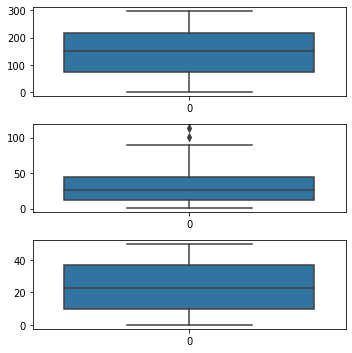

In [7]:
# Проверка, есть ли выбросы
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

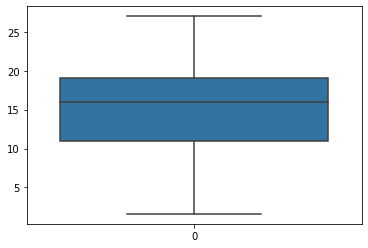

In [8]:
# Целевая переменная
sns.boxplot(advertising['Sales'])
plt.show()

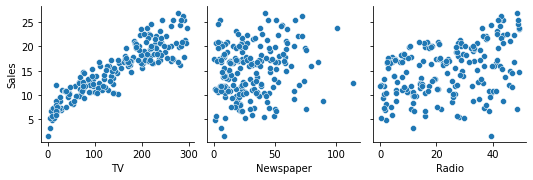

In [9]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales')
plt.show()

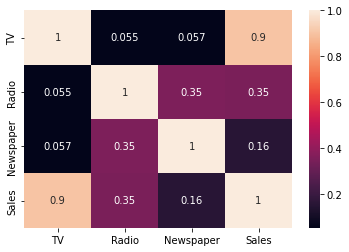

In [10]:
sns.heatmap(advertising.corr(), annot=True)
plt.show()

# Собираем датасет

In [11]:
X = advertising['TV']
y = advertising['Sales']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

NameError: name 'X' is not defined

In [13]:
# Let's now take a look at the train dataset

X_train.head()

131    265.2
96     197.6
181    218.5
19     147.3
153    171.3
Name: TV, dtype: float64

In [14]:
y_train.head()

131    17.7
96     16.7
181    17.2
19     14.6
153    16.0
Name: Sales, dtype: float64

# Линейная регрессия

$y = w_0 + w_1x_1$

In [15]:
# Добавляем константу w0, так как в библиотеке sm она не предусмотрена
X_train_full = sm.add_constant(X_train)
X_train_full

,const,TV
131,1.0,265.2
96,1.0,197.6
181,1.0,218.5
19,1.0,147.3
153,1.0,171.3
...,...,...
67,1.0,139.3
192,1.0,17.2
117,1.0,76.4
47,1.0,239.9


In [16]:
# OLS - ordinary least squares
model = sm.OLS(y_train, X_train_full).fit()

In [17]:
model.params

const    7.143822
TV       0.054732
dtype: float64

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.1
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.56e-51
Time:                        11:30:06   Log-Likelihood:                -312.40
No. Observations:                 140   AIC:                             628.8
Df Residuals:                     138   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1438      0.400     17.838      0.000       6.352       7.936
TV             0.0547      0.002     23.940      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.248   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.392
Skew:                           0.078   Prob(JB):                        0.822
Kurtosis:                       2.792   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

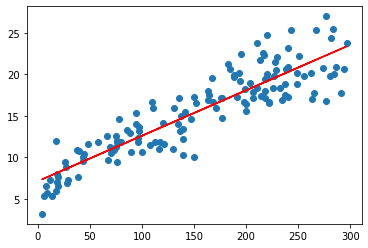

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.143822 + 0.054732 * X_train, 'r')
plt.show()

# Оценка модели

In [20]:
X_test_full = sm.add_constant(X_test)
y_pred = model.predict(X_test_full)

In [21]:
mean_squared_error(y_test, y_pred)

5.569539193467246

In [22]:
mean_absolute_error(y_test, y_pred)

1.863943891655056

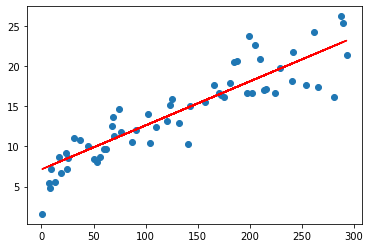

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.143822 + 0.054732 * X_test, 'r')
plt.show()